In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('world-happiness-report.csv')
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
# ganti nama US to USA
usa_index=df[df['Country']=='United States'].index[0]
df.iloc[usa_index,0]='United States of America'

In [4]:
df.shape

(158, 12)

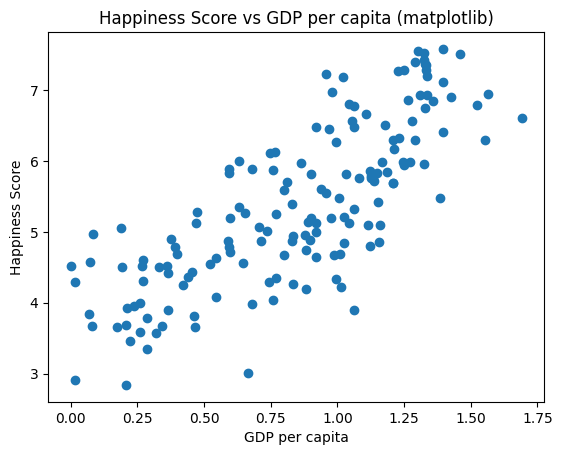

In [8]:
# buat scatter plot - matplotlib
fig, ax = plt.subplots()
ax.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'])
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Happiness Score')
ax.set_title('Happiness Score vs GDP per capita (matplotlib)')
plt.show()

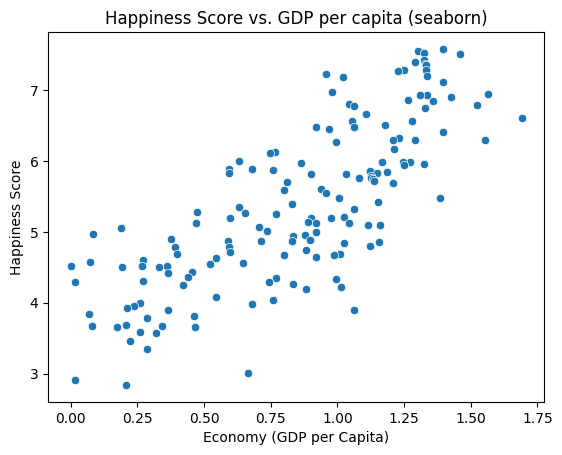

In [9]:
# buat scatter plot - seaborn

sns.scatterplot(data=df, x='Economy (GDP per Capita)', y='Happiness Score')
plt.title('Happiness Score vs. GDP per capita (seaborn)')
plt.show()

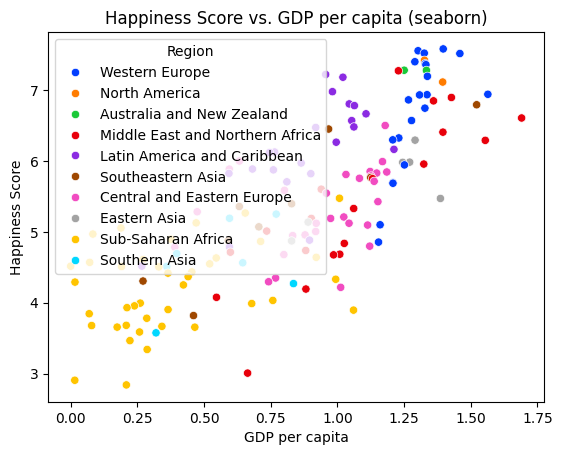

In [10]:
# buat scatter plot - seaborn with colors

sns.scatterplot(data=df, x='Economy (GDP per Capita)', y='Happiness Score', hue='Region', palette='bright')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. GDP per capita (seaborn)')
plt.show()

In [12]:
# scatter plot - plotly
fig = px.scatter(df, x='Health (Life Expectancy)', y='Happiness Score', color='Region', hover_name='Country', size='Economy (GDP per Capita)')
fig.update_layout(title='Country-wise Happiness Score vs Life Expectancy (plotly)')
fig.show()

Waffle

In [13]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 76.2 MB/s eta 0:00:00


In [14]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

In [15]:
dfUnhappy = df[df['Happiness Score']<5]
dfHappy = df[df['Happiness Score']>=5]

In [16]:
# cari angka total unhappy countries
dfur = dfUnhappy.groupby(['Region']).count()
dfur = dfur.sort_values(by=['Country'], ascending=False)
usum = dfur['Country'].sum()

In [17]:
# cari angka total happy countries
dfhr = dfHappy.groupby(['Region']).count()
dfhr = dfhr.sort_values(by=['Country'], ascending=False)
hsum = dfhr['Country'].sum()

In [18]:
# kalkulasi
uper = (usum*100)/(usum+hsum)
uper = round(uper, 1)
hper = (hsum*100)/(usum+hsum)
hper = round(hper, 1)

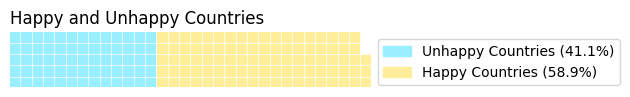

In [21]:
# plot
plt.figure(
    title={"label": "Happy and Unhappy Countries", "loc": "left"},
    FigureClass = Waffle,
    rows = 5,
    # icons = 'face-smile',
    values = [usum,hsum],
    font_size=12,
    icon_legend=True,
    labels=list(['Unhappy Countries ('+str(uper) +"%)", 'Happy Countries ('+ str(hper) +"%)"]),
    colors = ["#99EEFF", "#FFEE99"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()